In [1]:
print("Kernel Working fine")

Kernel Working fine


In [2]:
import os
import requests
from PIL import Image

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

/Users/atharvabot7/Downloads/MultiModal RAG using Gemini and Langchain/multimodalRAG/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

In [6]:
from langchain.vectorstores import DocArrayInMemorySearch

In [7]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

In [8]:
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

In [9]:
from langchain_text_splitters import CharacterTextSplitter

In [10]:
from langchain_community.vectorstores import FAISS

In [11]:
from load_dotenv import load_dotenv
load_dotenv()

True

In [12]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [13]:
import google.generativeai as genai


In [14]:
genai.configure(api_key=GOOGLE_API_KEY)

In [15]:
models = genai.list_models()

In [16]:

print("Available Gemini Models:")
for model in models:
    print(model.name)

Available Gemini Models:
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
mode

In [17]:
def load_model(model_name):
    if model_name == "gemini-2.5-pro":
        llm = ChatGoogleGenerativeAI(model="gemini-2.5-pro")
    else:
        llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

    return llm

In [18]:
model_text = load_model("gemini-2.5-pro")

In [19]:
model_text.invoke("who is a good football player?").content

'That\'s a fantastic but very broad question! The answer depends heavily on which "football" you mean and what qualities you value in a player.\n\nI\'ll break it down for both **Association Football (Soccer)** and **American Football**.\n\n---\n\n### **1. Association Football (Soccer)**\n\nIn soccer, "good" can mean a goal-scoring machine, a creative genius, a defensive rock, or an all-around leader.\n\n#### The Current "Best in the World" Conversation\n\nFor the last 15 years, the debate has been dominated by two players who are arguably the greatest of all time (GOATs):\n\n*   **Lionel Messi (Argentina / Inter Miami):** Often considered the most naturally gifted player ever. He is a genius at dribbling, has incredible vision for passing, and is one of the most prolific goalscorers in history. His 2022 World Cup victory with Argentina cemented his legendary status for many.\n*   **Cristiano Ronaldo (Portugal / Al Nassr):** The definition of a supreme athlete and a relentless goalscore

In [20]:
def get_image(url, filename, extension):
    import requests
    from PIL import Image
    
    save_path = f'{filename}.{extension}'

    content = requests.get(url).content
    with open(save_path, 'wb') as f:
        f.write(content)

    image = Image.open(save_path)
    return image


In [34]:
image = get_image("https://www.amalgamcollection.com/cdn/shop/products/DSCF3147_2a02661c-8bd7-4c57-a682-981e080266c4_4000x2677_crop_center.jpg?v=1705404244", "Buggati_Veyron", "jpg")

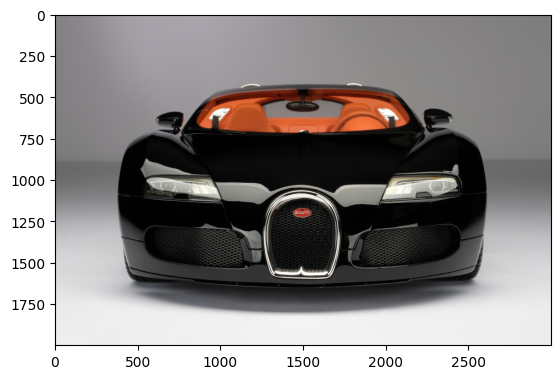

In [35]:
plt.imshow(image)
plt.show()

In [36]:
vision_model = load_model("gemini-2.0-flash")

In [37]:
image_url = "https://www.amalgamcollection.com/cdn/shop/products/DSCF3147_2a02661c-8bd7-4c57-a682-981e080266c4_4000x2677_crop_center.jpg?v=1705404244"

message = HumanMessage(
    content=[
        {"type": "text", "text": "Which car is depicted in the image?"},
        {"type": "image_url", "image_url": {"url": image_url}}
    ]
)

In [38]:
response = vision_model.invoke([message])
print(response.content)

The car depicted in the image is a Bugatti Veyron Grand Sport.


In [39]:
loader = TextLoader("bugatti.txt")
print(loader.load()[0].page_content)

Bugatti is a French luxury hypercar manufacturer renowned for its extraordinary performance, exquisite design, and exclusivity. With a rich history spanning over a century, Bugatti consistently pushes the boundaries of automotive engineering and artistry.

History and Ownership
Founded by Ettore Bugatti in 1909 in Molsheim, France (then part of Germany), Automobiles Ettore Bugatti quickly gained recognition for its innovative designs and racing prowess.
After Ettore Bugatti's passing in 1947 and the earlier death of his son in 1939, the company ceased car production for several decades.
In 1987, Italian entrepreneur Romano Artioli revived the brand as Bugatti Automobili S.p.A., producing the EB 110.
A significant turning point came in 1998 when the Volkswagen Group acquired Bugatti, re-establishing its roots in Molsheim, France.
Today, Bugatti is owned by Bugatti Rimac, a joint venture between Rimac Automobili (a Croatian electric hypercar manufacturer) and Porsche AG (part of the Volk

In [40]:
def get_text_chunks_langchain(text):
    text_splitter = CharacterTextSplitter(chunk_size=50, chunk_overlap=20)
    docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
    return docs

In [41]:
text = loader.load()[0].page_content

In [42]:
docs = get_text_chunks_langchain(text)

Created a chunk of size 255, which is longer than the specified 50
Created a chunk of size 1139, which is longer than the specified 50
Created a chunk of size 63, which is longer than the specified 50
Created a chunk of size 877, which is longer than the specified 50
Created a chunk of size 126, which is longer than the specified 50
Created a chunk of size 504, which is longer than the specified 50
Created a chunk of size 1397, which is longer than the specified 50
Created a chunk of size 698, which is longer than the specified 50
Created a chunk of size 393, which is longer than the specified 50
Created a chunk of size 900, which is longer than the specified 50
Created a chunk of size 940, which is longer than the specified 50


In [43]:
models = genai.list_models()

print("📌 Embedding Models:")
for model in models:
    if "embedContent" in model.supported_generation_methods:
        print(f"- {model.name}")

📌 Embedding Models:
- models/embedding-001
- models/text-embedding-004
- models/gemini-embedding-exp-03-07
- models/gemini-embedding-exp


In [44]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [45]:
vectorstore = FAISS.from_documents(docs, embedding=embeddings)

In [46]:
retriever = vectorstore.as_retriever()

In [47]:
retriever.invoke("What is the cost of this car?")

[Document(id='f154bfea-f95a-45f1-a068-ef63bbde20a9', metadata={}, page_content='Deeper Dive into Bugatti\'s Philosophy and Design\nArt and Engineering Intertwined: Ettore Bugatti, the founder, came from a family of artists (his father Carlo Bugatti was a renowned Art Nouveau furniture designer, and his brother Rembrandt Bugatti was a famous sculptor). This artistic lineage deeply influenced Ettore\'s approach to car manufacturing. He famously said, "If it is comparable, it is no longer Bugatti." This wasn\'t just about speed; it was about creating mobile sculptures that were technically superior.\nThe "Horsecollar" Grille: While commonly thought to resemble a horseshoe (a nod to Ettore\'s passion for horses), the iconic Bugatti grille is actually inspired by the shape of an egg. Ettore\'s father, Carlo, considered the egg shape to be the "perfect form." This small detail underscores the deep aesthetic consideration in every aspect of Bugatti design.\nForm Follows Performance, and Vice 

In [48]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda

In [49]:
llm_vision = load_model("gemini-2.0-flash")

In [50]:
llm_text = load_model("gemini-2.5-pro")

In [51]:
template = """
'''
{context}
'''
{query}

Provide answer in detail about the question asked by the user and also tell about the Power in BHP and any other interesting facts about the car.
"""

In [52]:
prompt = ChatPromptTemplate.from_template(template)

In [53]:
rag_chain = (
    {"context": retriever,
    "query": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

In [54]:
result = rag_chain.invoke("Tell me about the company of the car and its history.")

In [55]:
display(Markdown(f"**Answer:** {result}"))

**Answer:** Based on the documents provided, here is a detailed overview of the Bugatti company, its history, and other interesting facts.

### The Company and Its History

Bugatti is a renowned French luxury hypercar manufacturer known for its exceptional performance, artistic design, and exclusivity.

**Early History and Founding:**
*   The company was founded in **1909** by **Ettore Bugatti** in Molsheim, France (which was part of the German Empire at the time).
*   It quickly became famous for its innovative engineering and success in racing.
*   Ettore Bugatti came from a family of artists, which deeply influenced his philosophy of treating cars as mobile sculptures that were both technically superior and aesthetically beautiful. His famous motto was, **"If it is comparable, it is no longer Bugatti."**

**Dormant Period and Revivals:**
*   Following the death of Ettore Bugatti in 1947 and his son's earlier passing in 1939, the original company stopped producing cars for several decades.
*   In **1987**, the brand was revived by Italian entrepreneur **Romano Artioli**, who formed Bugatti Automobili S.p.A. and produced the famous EB 110 supercar.

**Modern Era and Current Ownership:**
*   A major turning point occurred in **1998** when the **Volkswagen Group** acquired the Bugatti brand. They re-established the company's headquarters in its original home of Molsheim, France.
*   Today, Bugatti is owned by **Bugatti Rimac**, a joint venture formed between **Rimac Automobili** (a Croatian electric hypercar manufacturer) and **Porsche AG** (which is part of the Volkswagen Group).

### Power in BHP

The provided documents do not contain specific figures for the power output (BHP) of Bugatti cars. However, they emphasize the extreme performance capabilities, mentioning that a special "Speed Key" is required to unlock the full top speed of a car like the Chiron (beyond 236 mph) and that every car is tested at speeds exceeding 300 km/h before delivery.

### Other Interesting Facts

**Manufacturing and Craftsmanship:**
*   **The "Atelier":** Bugatti cars are meticulously hand-assembled in a facility in Molsheim called the "Atelier," which is more like an art studio or a Formula One workshop than a traditional factory. There are no conveyor belts or robots.
*   **Obsessive Quality Control:** Every component is inspected with extreme precision. Experts use 3D scanners to measure parts with an accuracy of 0.005 millimeters, and any part that deviates even slightly is rejected.
*   **Hand-Laid Carbon Fiber:** For cars with a visible carbon fiber finish, the weave must be perfectly aligned across the entire body. It can take months just to apply the clear coat and polish this finish to perfection.

**Design Philosophy and Details:**
*   **The "Horsecollar" Grille:** While many think it resembles a horseshoe, the iconic front grille is actually inspired by the shape of an egg, which Ettore Bugatti's father considered to be the "perfect form."
*   **Form Follows Performance:** The design is not just for looks. For example, the signature "C-line" on the side of the Chiron is inspired by the historic Type 57 SC Atlantic but also serves a functional purpose by aiding airflow and improving structural rigidity.
*   **The "Speed Key":** This is a second, physical key that the owner must insert into a special slot to unlock the car's maximum top speed. It acts as a deliberate safety measure to ensure the driver is intentionally engaging the car's extreme performance mode.

**The Ownership Experience:**
*   **Exclusive Club:** Owning a Bugatti is described as entering an exclusive lifestyle club, with personalized sales processes and unique owner events.
*   **Extensive Testing:** Before any car is delivered, it undergoes about 350 km of road and track testing, where engineers check everything, including the "creaking sound of leather seats during turns."
*   **Astronomical Maintenance:** The cost of ownership is extremely high. A single set of tires for a Veyron could cost around $12,000, and annual services run into the tens of thousands of dollars.

In [56]:
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

In [57]:
full_chain

RunnablePassthrough()
| ChatGoogleGenerativeAI(model='models/gemini-2.0-flash', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x11e43bc10>, default_metadata=())
| StrOutputParser()
| {
    context: VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x119cfcbe0>, search_kwargs={}),
    query: RunnablePassthrough()
  }
| ChatPromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'query'], input_types={}, partial_variables={}, template="\n'''\n{context}\n'''\n{query}\n\nProvide answer in detail about the question asked by the user and also tell about the Power in BHP and any other interesting facts about the car.\n"), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='model

In [58]:
url_1 = "https://www.segond-automobiles.com/wp-content/uploads/2024/10/Bugatti-Chiron-Sport-1.jpg"

In [59]:
image1 = get_image(url_1, "Chiron", "jpg")

In [60]:
message1 = HumanMessage(
    content=[
        {"type": "text",
        "text": "What is the cost of this car and where can I purchase it?",},
        {"type": "image_url", "image_url": {"url": url_1}},
    ]
)

In [62]:
result1 = full_chain.invoke([message1])

In [63]:
display(Markdown(f"**Answer:** {result1}"))

**Answer:** Of course! You've correctly identified the car from the provided context as the **Bugatti Chiron**. Your initial answers are spot on, and here is a more detailed breakdown based on the documents you provided, including power figures and other fascinating facts.

### **Cost & How to Purchase**

*   **Cost:** As you noted, the base price for a Bugatti Chiron starts at approximately **$3 million USD**. However, this is merely a starting point. The final price can escalate dramatically based on the specific variant and the extensive bespoke customization options available. Limited editions like the Divo (40 units) were priced at around $5.8 million, while the one-off La Voiture Noire sold for a reported $18.7 million, making it one of the most expensive new cars ever sold.

*   **Where to Purchase:** You cannot simply walk into a showroom and buy a Chiron. The process is a highly exclusive experience managed through a global network of authorized Bugatti dealers. An interested buyer would work directly with a dealer to secure a production slot (if available) and begin the extensive customization process. The delivery itself is a major event, often taking place at the "Atelier" in Molsheim, France, where the owner receives a comprehensive tour and a special handover ceremony.

---

### **Power in BHP & Performance**

The heart of the Bugatti Chiron is its monumental engine, a masterpiece of modern engineering.

*   **Power:** The Chiron's 8.0-liter quad-turbocharged W16 engine produces a staggering **1,479 horsepower (hp)** for the standard model. In the automotive world, hp and brake horsepower (bhp) are often used interchangeably, so you can consider this figure as its bhp.
    *   The document also notes this is equivalent to **1,500 PS** (Pferdestärke), a metric commonly used in Europe.
    *   More powerful variants, like the Chiron Super Sport, have their output increased to **1,578 hp**.

*   **Torque:** The engine generates an immense **1,180 lb-ft of torque**, which is responsible for its incredible acceleration.

*   **Acceleration (0-60 mph):** It can launch from 0 to 60 mph in approximately **2.3 to 2.6 seconds**.

*   **Top Speed:** The standard Chiron is electronically limited to **261 mph (420 km/h)**. However, the Chiron Super Sport 300+ variant famously broke the 300 mph barrier, achieving a record-breaking, officially verified top speed of **304.773 mph (490.484 km/h)**.

---

### **Other Interesting Facts About the Chiron**

The documents provide a wealth of fascinating details that go far beyond the spec sheet, highlighting what makes a Bugatti so special.

*   **Hand-Assembled in an "Atelier," Not a Factory:** Each Chiron is meticulously hand-assembled by a small team of highly skilled technicians in Molsheim, France. The facility, known as the "Atelier," has no conveyor belts or robots. It functions more like a Formula One team's workshop, with each car built at a dedicated station.

*   **The "Speed Key":** To unlock the Chiron's full top speed potential (beyond 236 mph), the owner must use a second, physical "Speed Key." Inserting this key into a special slot initiates a series of checks and adjustments to the car's systems, acting as a deliberate and symbolic act to prepare for extreme speeds.

*   **Obsessive Perfection in Craftsmanship:**
    *   **Carbon Fiber Weave:** For cars with an exposed carbon fiber finish, the weave of every single panel must be perfectly aligned at a 45-degree angle across the entire car. Any panel with a deviation of more than 1 or 2 degrees is scrapped.
    *   **Quality Control:** Components are measured with an accuracy of 0.005 millimeters. The slightest deviation from the design means the part is rejected.

*   **The "C-Line" is Functional Art:** The iconic sweeping "C" shape on the side of the car is not just a design flourish. It's a structural component that improves the car's rigidity and also helps channel air into the massive W16 engine for cooling.

*   **Rigorous Pre-Delivery Testing:** Before a single customer receives their car, every Chiron undergoes about 350 km of road and track testing by Bugatti's professional test drivers. This includes high-speed runs on an airport runway and meticulous checks for every detail, right down to the "creaking sound of leather seats during turns."

*   **The End of an Era:** The Chiron and its derivatives (like the Divo and Centodieci) represent the pinnacle and the finale of the purely internal combustion W16 engine. Its successor, the **Bugatti Tourbillon**, will carry the W16 legacy forward but will integrate it with a powerful hybrid electric system, marking a new era for the brand.